In [23]:
import numpy as np

np.load("/users/rkrish16/data/rkrish16/other/chessRL/rl_chess/logs/self_td_error_trace.npy")

array([ -195.32099321, -2001.73909935, -1414.25309413, -1427.19494331,
       -1267.35610534, -1188.93040793, -1407.36066038, -1282.80169645,
       -1226.52323156, -1066.15130377,  -942.79083868,  -870.6927879 ,
        -825.17302702,  -931.44803346,  -893.70472769,  -834.0653162 ,
        -798.62057488,  -774.58532782,  -759.59382788])

In [39]:
import numpy as np

self_reward_trace = np.load("rl_chess/logs/may_1_11hr/puzzle_reward_trace.npy")
self_reward_trace = np.append(self_reward_trace, np.load("rl_chess/logs/self_reward_trace.npy"))
print("SELF", self_reward_trace.shape)

puzzle_reward_trace = np.load("rl_chess/logs/may_1_11hr/self_reward_trace.npy")
puzzle_reward_trace = np.append(puzzle_reward_trace, np.load("rl_chess/logs/puzzle_reward_trace.npy"))
print("PUZZLE", puzzle_reward_trace.shape)

SELF (186866,)
PUZZLE (171869,)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

reward_smooth = pd.DataFrame(self_reward_trace)
reward_smooth.rolling(window=1000, min_periods=0).mean().plot(
    figsize=(16, 9), title="(Puzzle Training) Rolling Mean of Reward"
)
plt.show()

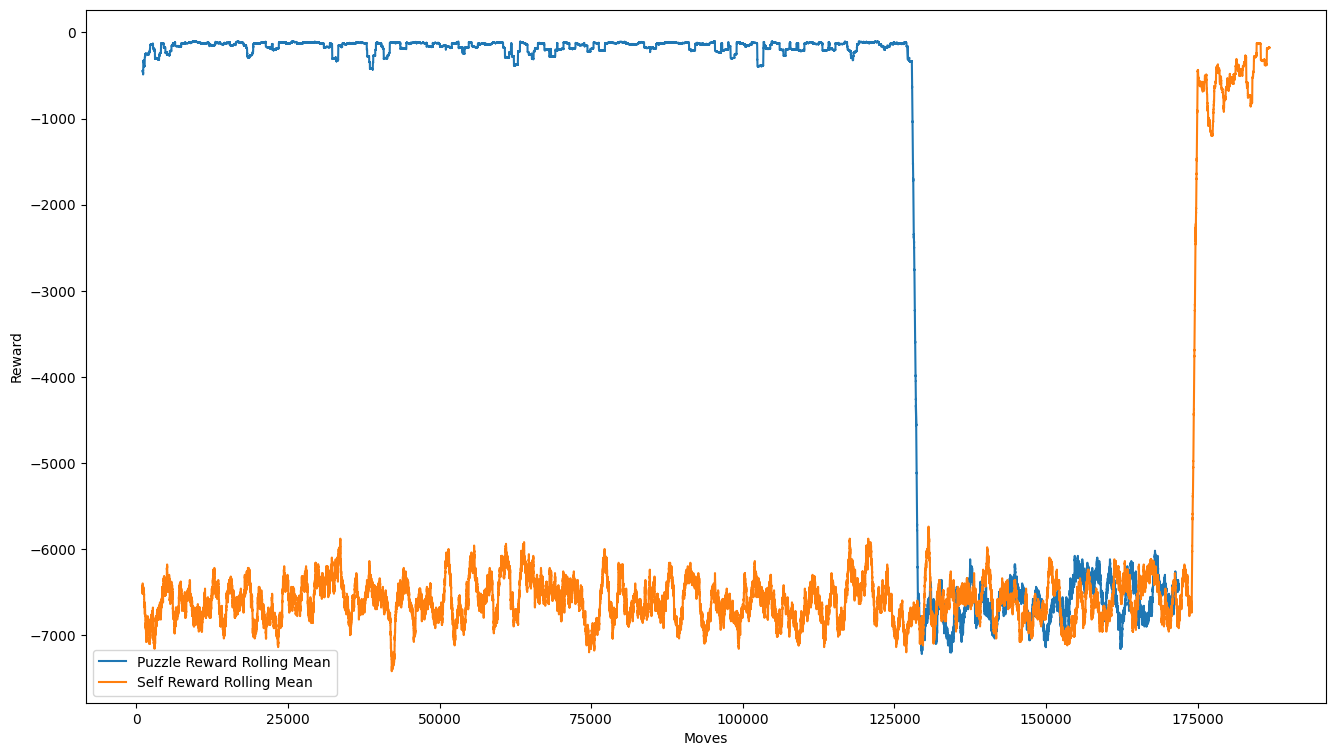

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate rolling mean
puzzle_reward_rolling_mean = pd.Series(puzzle_reward_trace).rolling(window=1000).mean()
self_reward_rolling_mean = pd.Series(self_reward_trace).rolling(window=1000).mean()

# Plot the rolling mean
plt.figure(figsize=(16, 9))
plt.plot(puzzle_reward_rolling_mean, label='Puzzle Reward Rolling Mean')
plt.plot(self_reward_rolling_mean, label='Self Reward Rolling Mean')
plt.xlabel('Moves')
plt.ylabel('Reward')
plt.legend()
plt.show()